## Problem 10 (MDSD uni-siegen):

In [24]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t = sp.symbols('t')  # Time variable
# Define theta_1 and theta_2 as functions of time
theta_1 = sp.Function('θ1')(t)  # θ1 as a function of time
theta_2 = sp.Function('θ2')(t)  # θ2 as a function of time

L1 = sp.symbols('L1')
L2 = sp.symbols('L2')

r_k1_oa = sp.Matrix([L1, 0, 0])
r_k2_ap = sp.Matrix([L2, 0, 0])

A_K1_K2 = sp.Matrix([[sp.cos(theta_2), sp.sin(theta_2), 0],
                     [-sp.sin(theta_2), sp.cos(theta_2), 0],
                     [0, 0, 1]])

A_I_K1 = sp.Matrix([[sp.cos(theta_1), sp.sin(theta_1), 0],
                     [-sp.sin(theta_1), sp.cos(theta_1), 0],
                     [0, 0, 1]])

sp.pprint(r_k1_oa)
sp.pprint(r_k2_ap)
sp.pprint(A_I_K1)
sp.pprint(A_K1_K2)

# Calculate final position
final_position = A_I_K1 * (r_k1_oa + A_K1_K2 * r_k2_ap)

# Print final position
sp.pprint(final_position)

# Calculate velocity by taking the derivative of the final position with respect to time
velocity = sp.diff(final_position, t)

# Print velocity
sp.pprint(velocity)

# Calculate acceleration by taking the derivative of the velocity with respect to time
acceleration = sp.diff(velocity, t)

# Print acceleration
sp.pprint(acceleration)

⎡L₁⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣0 ⎦
⎡L₂⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣0 ⎦
⎡cos(θ₁(t))   sin(θ₁(t))  0⎤
⎢                          ⎥
⎢-sin(θ₁(t))  cos(θ₁(t))  0⎥
⎢                          ⎥
⎣     0           0       1⎦
⎡cos(θ₂(t))   sin(θ₂(t))  0⎤
⎢                          ⎥
⎢-sin(θ₂(t))  cos(θ₂(t))  0⎥
⎢                          ⎥
⎣     0           0       1⎦
⎡-L₂⋅sin(θ₁(t))⋅sin(θ₂(t)) + (L₁ + L₂⋅cos(θ₂(t)))⋅cos(θ₁(t))⎤
⎢                                                           ⎥
⎢-L₂⋅sin(θ₂(t))⋅cos(θ₁(t)) - (L₁ + L₂⋅cos(θ₂(t)))⋅sin(θ₁(t))⎥
⎢                                                           ⎥
⎣                             0                             ⎦
⎡                           d                                    d             ↪
⎢- L₂⋅sin(θ₁(t))⋅cos(θ₂(t))⋅──(θ₂(t)) - L₂⋅sin(θ₂(t))⋅cos(θ₁(t))⋅──(θ₁(t)) - L ↪
⎢                           dt                                   dt            ↪
⎢                                                                              ↪
⎢                         

⎡(2⋅cos(θ₂(t)) + 4)⋅cos(θ₁(t)) - 2⋅sin(θ₁(t))⋅sin(θ₂(t)) ⎤
⎢                                                        ⎥
⎢-(2⋅cos(θ₂(t)) + 4)⋅sin(θ₁(t)) - 2⋅sin(θ₂(t))⋅cos(θ₁(t))⎥
⎢                                                        ⎥
⎣                           0                            ⎦
Theta_1:
[[0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 ...
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]]

Theta_2:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.06346652 0.06346652 0.06346652 ... 0.06346652 0.06346652 0.06346652]
 [0.12693304 0.12693304 0.12693304 ... 0.12693304 0.12693304 0.12693304]
 ...
 [6.15625227 6.156

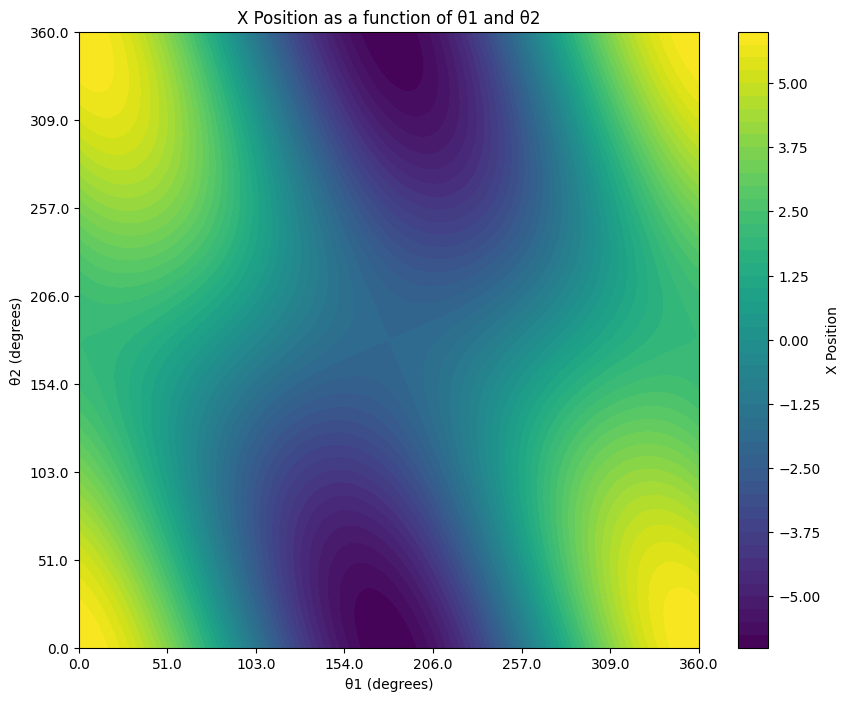

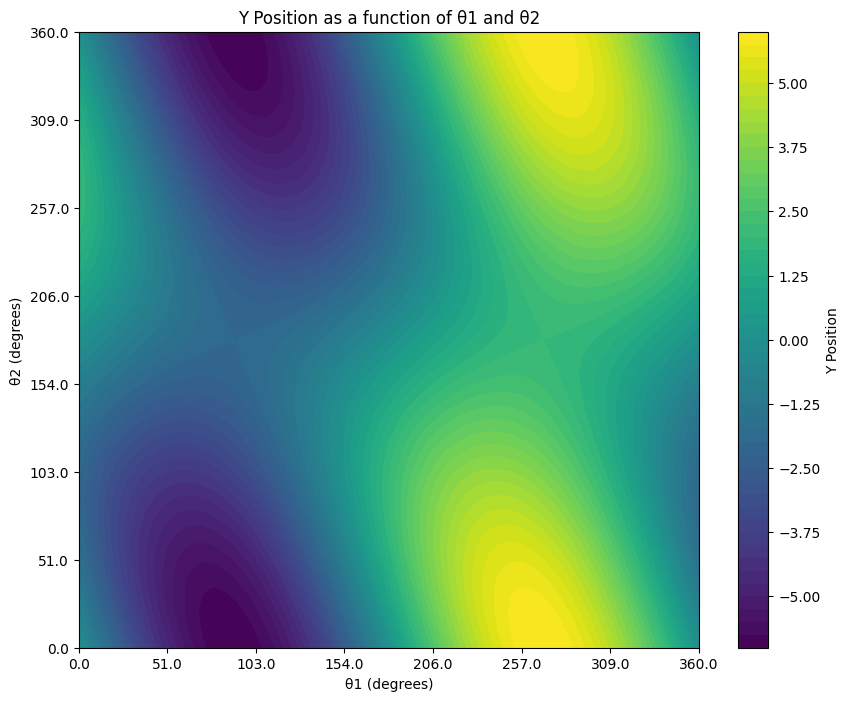

In [21]:
final_position_evaluated = final_position.subs({L1: 4, L2: 2})
sp.pprint(final_position_evaluated)

# Create a function to evaluate the final position
# Flatten the final position to return a 1D array
final_position_func = sp.lambdify((theta_1, theta_2), (final_position_evaluated[0], final_position_evaluated[1]), 'numpy')

# Generate values for theta_1 and theta_2
theta_1_vals = np.linspace(0, 2 * np.pi, 100)  # 0 to 2π
theta_2_vals = np.linspace(0, 2 * np.pi, 100)  # 0 to 2π

# Create a meshgrid for theta_1 and theta_2
Theta_1, Theta_2 = np.meshgrid(theta_1_vals, theta_2_vals)
# Print the meshgrid values
print("Theta_1:")
print(Theta_1)
print("\nTheta_2:")
print(Theta_2)

# Calculate final positions
final_positions = final_position_func(Theta_1, Theta_2)
print(final_positions)


# Extract x and y components for plotting
x_positions = final_positions[0]  # X component
y_positions = final_positions[1]  # Y component

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(Theta_1, Theta_2, x_positions, levels=50, cmap='viridis')
plt.colorbar(label='X Position')w
plt.title('X Position as a function of θ1 and θ2')
plt.xlabel('θ1 (degrees)')  # Change to degrees
plt.ylabel('θ2 (degrees)')  # Change to degrees
plt.xticks(np.linspace(0, 2 * np.pi, 8), np.round(np.linspace(0, 360, 8)))  # Set x-ticks for degrees
plt.yticks(np.linspace(0, 2 * np.pi, 8), np.round(np.linspace(0, 360, 8)))  # Set y-ticks for degrees
plt.show()

plt.figure(figsize=(10, 8))
plt.contourf(Theta_1, Theta_2, y_positions, levels=50, cmap='viridis')
plt.colorbar(label='Y Position')
plt.title('Y Position as a function of θ1 and θ2')
plt.xlabel('θ1 (degrees)')  # Change to degrees
plt.ylabel('θ2 (degrees)')  # Change to degrees
plt.xticks(np.linspace(0, 2 * np.pi, 8), np.round(np.linspace(0, 360, 8)))  # Set x-ticks for degrees
plt.yticks(np.linspace(0, 2 * np.pi, 8), np.round(np.linspace(0, 360, 8)))  # Set y-ticks for degrees
plt.show()


# Rotation Matrix

In [18]:
import sympy as sp

t = sp.symbols('t')  # Time variable
# Define theta_1 and theta_2 as functions of time
theta_1 = sp.Function('θ1')(t)  # θ1 as a function of time


A = sp.Matrix([[sp.cos(theta_1), sp.sin(theta_1), 0],
                [-sp.sin(theta_1), sp.cos(theta_1), 0],
                [0, 0, 1]])

A_dot = sp.diff(A,t)
A_trans = A.transpose()
omega = A_dot*A_trans
sp.pprint(sp.simplify(omega)) 

⎡                                                    2        d              2 ↪
⎢                       0                         sin (θ₁(t))⋅──(θ₁(t)) + cos  ↪
⎢                                                             dt               ↪
⎢                                                                              ↪
⎢     2        d              2        d                                       ↪
⎢- sin (θ₁(t))⋅──(θ₁(t)) - cos (θ₁(t))⋅──(θ₁(t))                        0      ↪
⎢              dt                      dt                                      ↪
⎢                                                                              ↪
⎣                       0                                               0      ↪

↪         d           ⎤
↪ (θ₁(t))⋅──(θ₁(t))  0⎥
↪         dt          ⎥
↪                     ⎥
↪                     ⎥
↪                    0⎥
↪                     ⎥
↪                     ⎥
↪                    0⎦
